In [7]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n
d

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [8]:
import thinkstats2
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [9]:
pmf.Prob(2)

0.4

In [10]:
pmf[2]

0.4

In [11]:
pmf.Incr(2,0.2)
pmf.Prob(2)

0.6000000000000001

In [13]:
pmf.Mult(2,0.5)
pmf.Prob(2)

0.30000000000000004

In [14]:
pmf.Total()

0.8999999999999999

In [15]:
pmf.Normalize()

0.8999999999999999

In [16]:
pmf.Total()

1.0

/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ThinkStats2/code/nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan
/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ThinkStats2/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


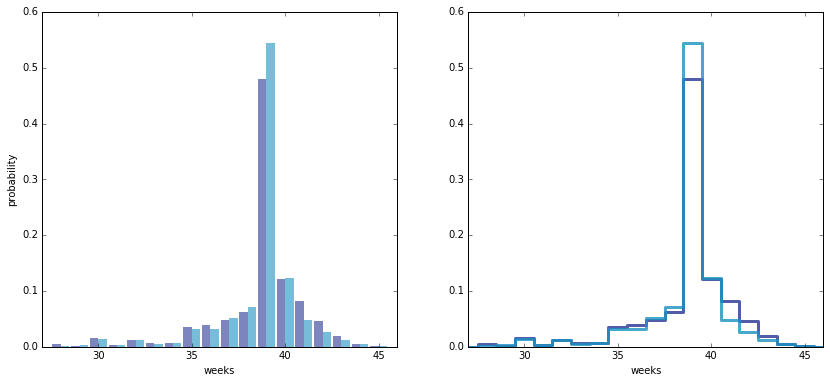

In [22]:
%matplotlib inline
import thinkplot
import nsfg
preg = nsfg.ReadFemPreg() 
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_pmf = thinkstats2.Pmf(firsts.prglngth)
other_pmf = thinkstats2.Pmf(others.prglngth)
width = 0.45
thinkplot.PrePlot(2, cols=2) 
thinkplot.Hist(first_pmf, align='right', width=width) 
thinkplot.Hist(other_pmf, align='left', width=width) 
thinkplot.Config(xlabel='weeks',ylabel='probability', axis=[27, 46, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf]) 
thinkplot.Show(xlabel='weeks',axis=[27, 46, 0, 0.6])

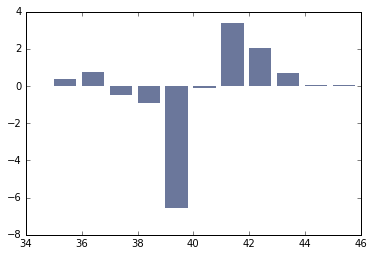

In [24]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week) 
    p2 = other_pmf.Prob(week) 
    diff = 100 * (p1 - p2) 
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)